In [0]:
import sys
print(sys.path)

You can read more about bnlearn package in python at - https://github.com/erdogant/bnlearn/blob/master/bnlearn/bnlearn.py 

# Import Libraries

In [0]:
import bnlearn
from statistics import mean
import torch
import numpy as np
import pyro
import pyro.distributions as dist
from pyro.infer import Importance, EmpiricalMarginal
import matplotlib.pyplot as plt
import networkx as nx
import graphviz
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
pyro.set_rng_seed(101)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import bnlearn
from pgmpy.models import BayesianModel
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
from ismember import ismember

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling  # GibbsSampling

from pgmpy import readwrite
import bnlearn.helpers.network as network

# Create a Dag



<bound method Graph.adjacency of <pgmpy.models.BayesianModel.BayesianModel object at 0x7f7d384baef0>>
[BNLEARN][plot] Making plot based on BayesianModel


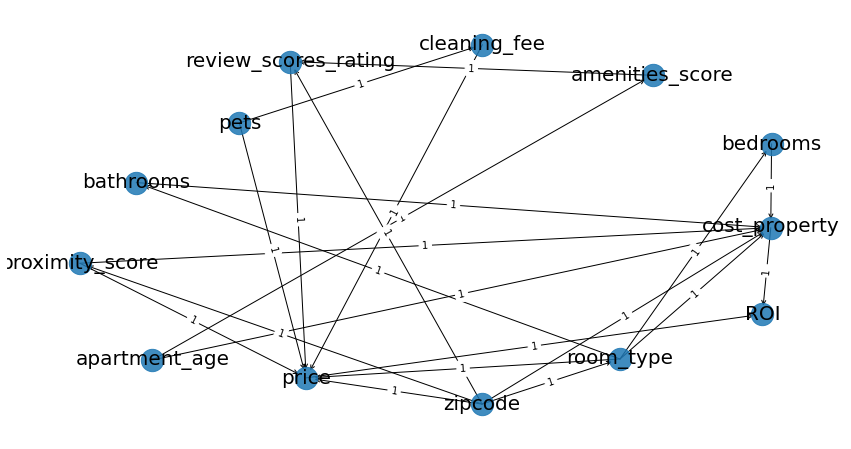

In [0]:
df = pd.read_csv('/content/listings_final (1).csv')

#Specify the edges in the same way as bnlearn

paths = [("bathrooms" , "cost_property"),
                    ("bedrooms" , "cost_property"),
                    ("price" , "ROI"),
                    ("amenities_score" , "review_scores_rating"),
                    ("apartment_age" , "amenities_score"),
                    ("apartment_age" , "cost_property"),
                    ("cleaning_fee" , "price"),
                    ("cost_property" , "ROI"),
                    ("proximity_score" , "price"),
                    ("proximity_score" , "cost_property"),
                    ("zipcode" , "price"),
                    ("zipcode" , "cost_property"),
                    ("zipcode" , "proximity_score"),
                    ("zipcode" , "review_scores_rating"),
                    ("zipcode" , "room_type"),
                    ("pets" , "price"),
                    ("pets" , "cleaning_fee"),
                    ("review_scores_rating" , "price"),
                    ("room_type" , "bathrooms"),
                    ("room_type" , "bedrooms"),
                    ("room_type" , "price"),
                    ("room_type" , "cost_property")]

model = BayesianModel(paths)
print(model.adjacency)
# model
# model = bnlearn.structure_learning.fit(df)
G = bnlearn.plot(model)
# model['adjmat']
# model_updated = bnlearn.parameter_learning.fit(model,df)


In [0]:
# Finding the vertices
vertices = list(model.nodes)

# Create adjacency matrix, which will be requireed to calculate CPT values
adj_matrix = np.zeros((len(vertices), len(vertices)))
for edge in paths:
   vertex_i = edge[0]
   vertex_j = edge[1]
   pos_i = vertices.index(vertex_i)
   pos_j = vertices.index(vertex_j)
   adj_matrix[pos_i][pos_j] = 1

In [0]:
# Print the vertices of graph
vertices

['bathrooms',
 'cost_property',
 'bedrooms',
 'price',
 'ROI',
 'amenities_score',
 'review_scores_rating',
 'apartment_age',
 'cleaning_fee',
 'proximity_score',
 'zipcode',
 'room_type',
 'pets']

In [0]:
# Print the adjacency matrix
adj_matrix

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [0]:
# Convert adjacency matrix to pandas dataframe
adjmat = pd.DataFrame(data=adj_matrix, columns=vertices, index=vertices)

In [0]:
model.nodes

NodeView(('bathrooms', 'cost_property', 'bedrooms', 'price', 'ROI', 'amenities_score', 'review_scores_rating', 'apartment_age', 'cleaning_fee', 'proximity_score', 'zipcode', 'room_type', 'pets'))

In [0]:
adjmat

,bathrooms,cost_property,bedrooms,price,ROI,amenities_score,review_scores_rating,apartment_age,cleaning_fee,proximity_score,zipcode,room_type,pets
bathrooms,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cost_property,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bedrooms,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amenities_score,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
review_scores_rating,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apartment_age,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cleaning_fee,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
proximity_score,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Create a dictionary model1 which has model and adjacency matrix
model1 = dict()
model1['model'] = model
model1['adjmat'] = adjmat

In [0]:
df = df.rename(columns=lambda x: x.strip())
columns = df.columns
columns_to_drop = set(columns) ^ set(vertices)
df = df.drop(columns_to_drop,axis=1)

In [0]:
df.columns

Index(['proximity_score', 'zipcode', 'cost_property', 'room_type', 'bathrooms',
       'bedrooms', 'amenities_score', 'price', 'ROI', 'cleaning_fee',
       'review_scores_rating', 'pets', 'apartment_age'],
      dtype='object')

# Learn CPT tables

In [0]:
# Specify the model and data to learn CPT tables
model_updated = bnlearn.parameter_learning.fit(model1,df)

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
CPD of bathrooms:
+----------------+----------------------------+-----------------------+-------------------------+
| room_type      | room_type(Entire home/apt) | room_type(Hotel room) | room_type(Private room) |
+----------------+----------------------------+-----------------------+-------------------------+
| bathrooms(0.0) | 0.08811349017534581        | 0.1111111111111111    | 0.1057194206575748      |
+----------------+----------------------------+-----------------------+-------------------------+
| bathrooms(1.0) | 0.19992950920785965        | 0.1111111111111111    | 0.14568136166613807     |
+----------------+----------------------------+-----------------------+-------------------------+
| bathrooms(1.5) | 0.09049255441008015        | 0.1111111111111111    | 0.11428269373083834     |
+----------------+----------------------------+-----------------------+-------------------------+
| bathrooms(2.0) | 0.13807383910476

There is some bug in the package which crashes the google colab and hence we tried a different way to create the CPT tables in pyro.

We imported the CPT table from R bnlearn package in python by saving it in json format.